Installing Requirements

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install matplotlib --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%pip install seaborn --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


STATE/UT
WEST BENGAL                    109792
PUNJAB                         101234
Andaman and Nicobar Islands     94449
UTTARAKHAND                     93458
MANIPUR                         93358
RAJASTHAN                       91272
Dadra and Nagar Haveli          90957
UTTAR PRADESH                   90304
PUDUCHERRY                      87385
ODISHA                          86839
Name: Total Crimes against Women, dtype: int64


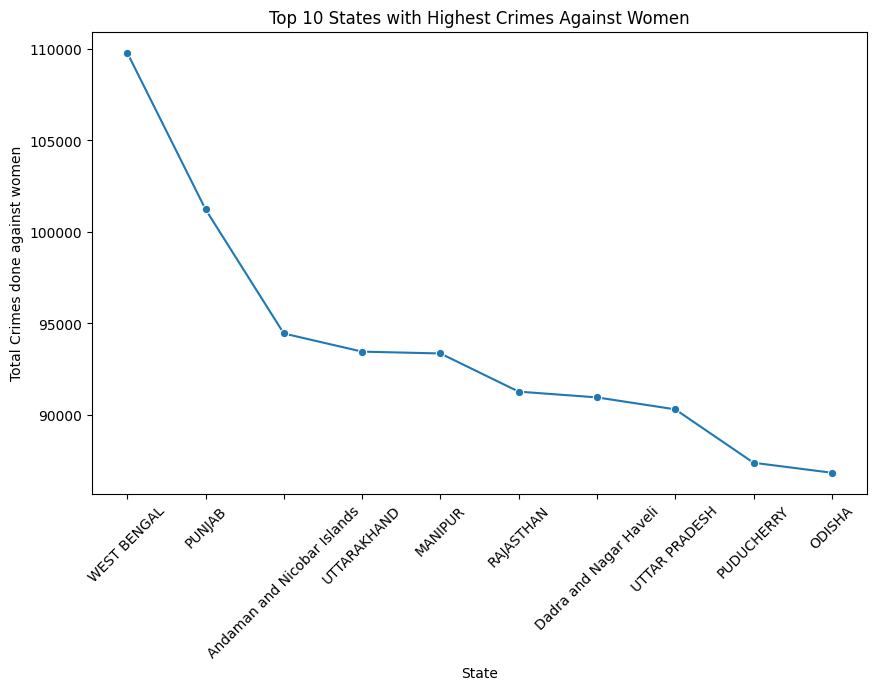

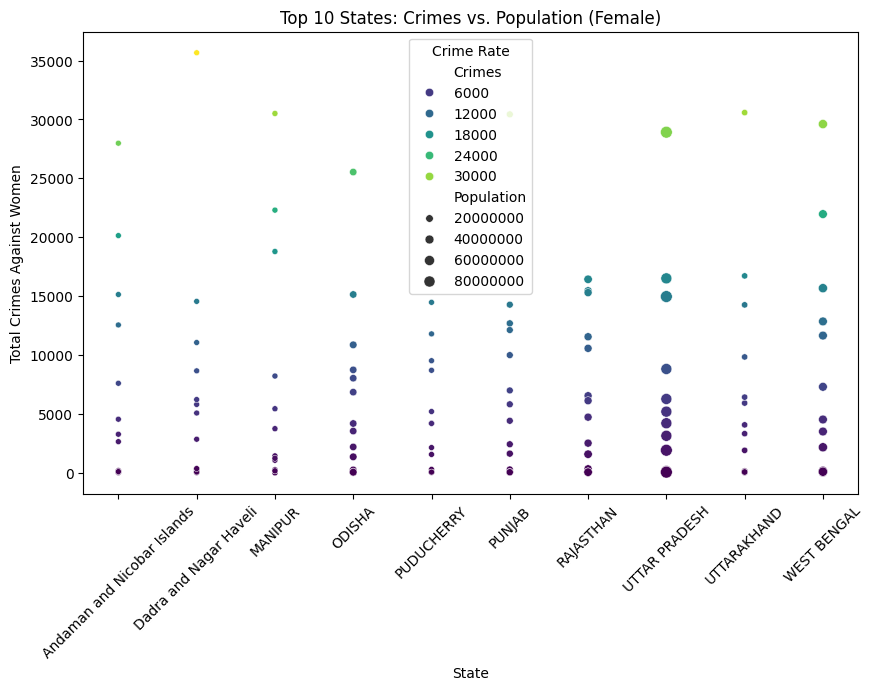

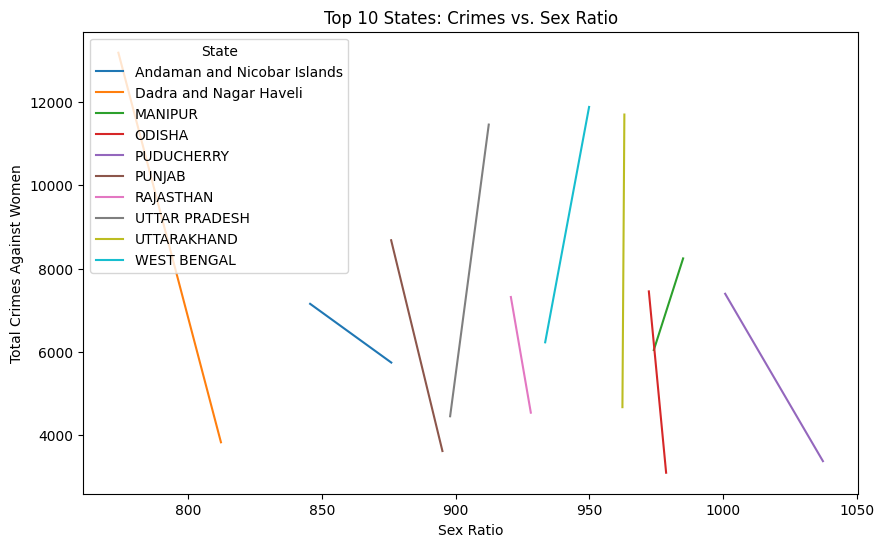

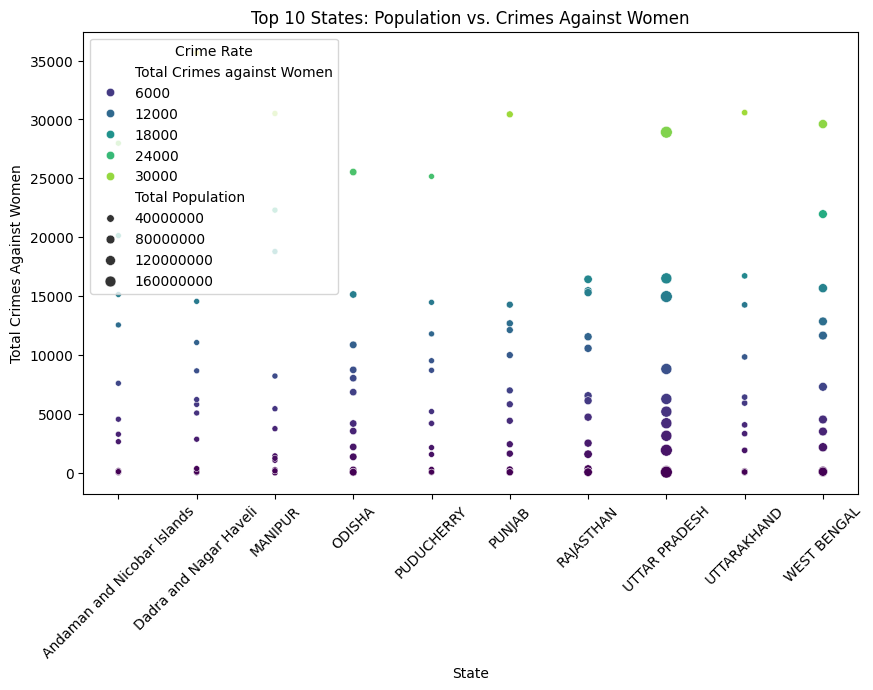

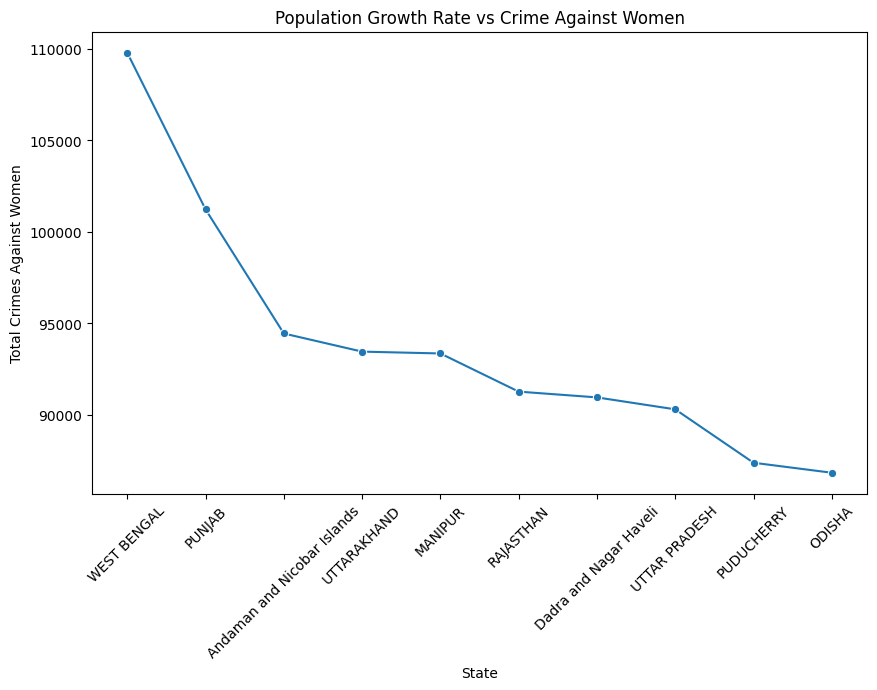

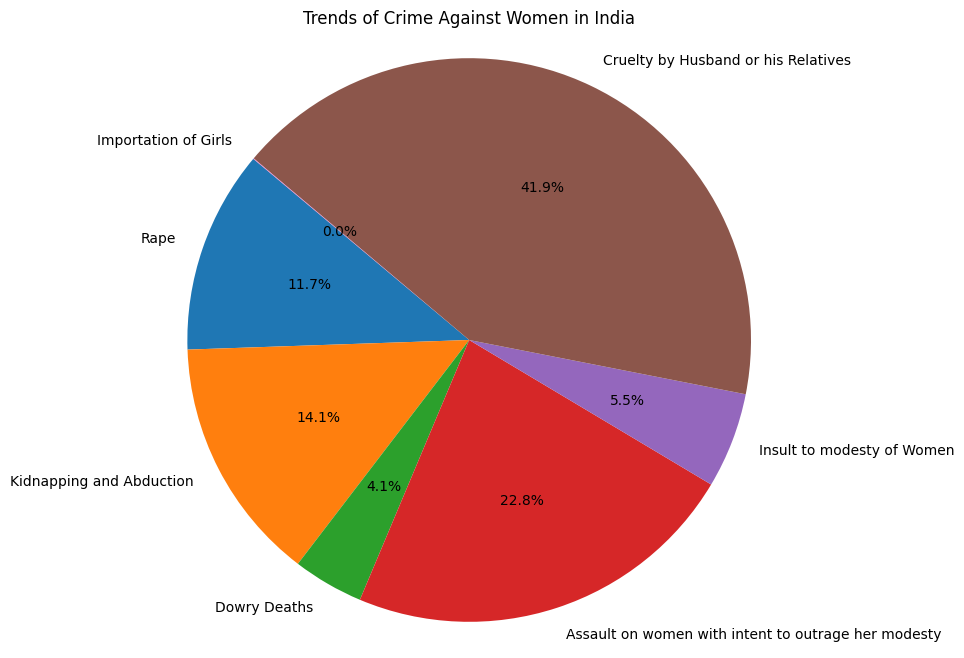

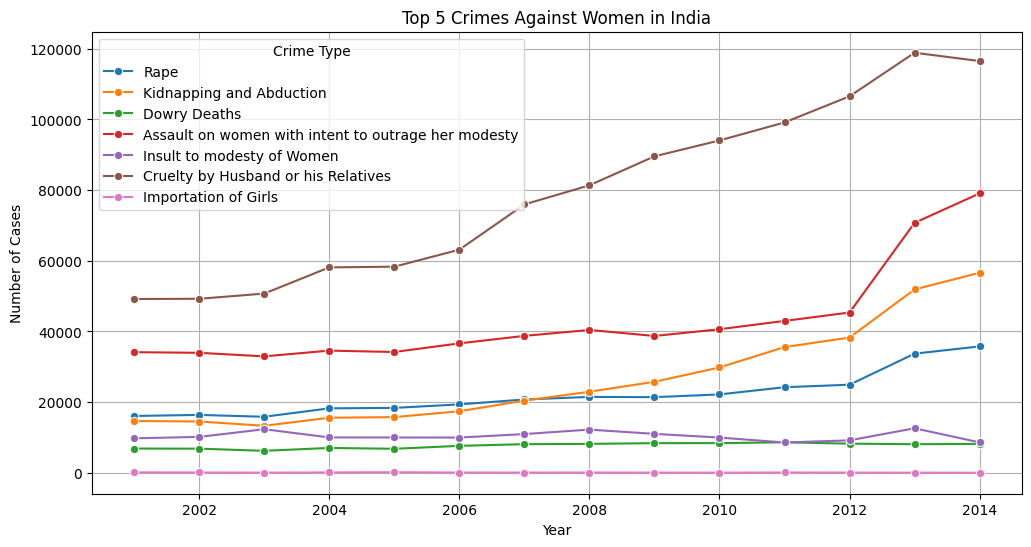

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a Pandas DataFrame
data = pd.read_csv("../data/DataOfCrimesInIndiaAgainstWomen.csv") 

# Sorting Year and States Accordingly
data.sort_values(by=['Year', 'STATE/UT'], inplace=True)
data = data.fillna(0)

# print(data)


rape = data['Rape']
kidnapping = data['Kidnapping and Abduction']
dowry_deaths = data['Dowry Deaths']
assault = data['Assault on women with intent to outrage her modesty']
insult = data['Insult to modesty of Women']
cruelty = data['Cruelty by Husband or his Relatives']
importation = data['Importation of Girls']
total_crimes_against_women = data['Total Crimes against Women']
total_crimes_in_india = data["Total Crimes In India"].unique()
literacy_rate_male = data['Literates - Males']
literacy_rate_female = data['Literates - Females']
population_of_female = data['Population - Females']
population_of_male = data['Population - Males']
state_union_terr = data['STATE/UT']






# TOP 10 STATES WITH THE HIGHEST CRIME RATE
# Group the data by state and sum the total crimes
state_wise_crimes = data.groupby('STATE/UT')['Total Crimes against Women'].sum()
# Sort the states by total crimes in descending order
top_10_states = state_wise_crimes.sort_values(ascending=False).head(10)
print(top_10_states)
plt.figure(figsize=(10, 6))
sns.lineplot(x=top_10_states.index, y=top_10_states.values, marker='o')
plt.title('Top 10 States with Highest Crimes Against Women')
plt.xlabel('State')
plt.ylabel('Total Crimes done against women')
plt.xticks(rotation=45)
plt.show()






# TOP 10 STATE LITERACY RATE VS CRIME AGAINST WOMEN
filtered_data = data[data['STATE/UT'].isin(top_10_states.index)]
population_column = 'Population - Females'
bubble_data = {
    'State': filtered_data['STATE/UT'],
    'Crimes': filtered_data['Total Crimes against Women'],
    'Population': filtered_data[population_column]
}
plt.figure(figsize=(10, 6))
sns.scatterplot(x='State', y='Crimes', size='Population', data=bubble_data, hue='Crimes', palette='viridis')
plt.title('Top 10 States: Crimes vs. Population (Female)')
plt.xlabel('State')
plt.ylabel('Total Crimes Against Women')
plt.legend(title='Crime Rate')
plt.xticks(rotation=45)
plt.show()








# TOP 10 STATES SEX RATIO VS CRIME RATE
# Calculate sex ratio (females per 1000 males)
data['Sex Ratio'] = (data['Population - Females'] / data['Population - Males']) * 1000

# Top 10 states with highest crime rate
state_wise_crimes = data.groupby('STATE/UT')['Total Crimes against Women'].sum()
top_10_states = state_wise_crimes.sort_values(ascending=False).head(10)
filtered_data = data[data['STATE/UT'].isin(top_10_states.index)]
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sex Ratio', y='Total Crimes against Women', hue='STATE/UT', data=filtered_data, errorbar=None)
plt.title('Top 10 States: Crimes vs. Sex Ratio')
plt.xlabel('Sex Ratio')
plt.ylabel('Total Crimes Against Women')
plt.legend(title='State')
plt.show()







# TOP 10 STATE POPULATION VS CRIME AGAINST WOMEN
# Calculate total population
data['Total Population'] = data['Population - Females'] + data['Population - Males']
state_wise_crimes = data.groupby('STATE/UT')['Total Crimes against Women'].sum()
top_10_states = state_wise_crimes.sort_values(ascending=False).head(10)
filtered_data = data[data['STATE/UT'].isin(top_10_states.index)]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='STATE/UT',
    y='Total Crimes against Women',
    size='Total Population',
    data=filtered_data,
    hue='Total Crimes against Women',
    palette='viridis'
)
plt.title('Top 10 States: Population vs. Crimes Against Women')
plt.xlabel('State')
plt.ylabel('Total Crimes Against Women')
plt.legend(title='Crime Rate')
plt.xticks(rotation=45)
plt.show()











# TOP 10 STATE POPULATION GROWTH RATE VS CRIME AGAINST WOMEN
def calculate_growth_rate(dataframe, state, population_column):
  state_data = dataframe[dataframe['STATE/UT'] == state]
  if len(state_data) >= 2:
    initial_population = state_data[population_column].iloc[0]
    final_population = state_data[population_column].iloc[-1]
    growth_rate = (final_population - initial_population) / initial_population
    return growth_rate
  else:
    return np.nan
data['Growth Rate'] = data.apply(lambda row: calculate_growth_rate(data, row['STATE/UT'], 'Population - Females'), axis=1)
# Assuming 'Growth Rate' (or another population growth metric) is calculated
top_10_states = state_wise_crimes.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.lineplot(x=top_10_states.index, y=top_10_states.values, marker='o')

plt.title('Population Growth Rate vs Crime Against Women')
plt.xlabel('State')
plt.ylabel('Total Crimes Against Women')
plt.xticks(rotation=45)
plt.show()














# TRENDS OF CRIME AGAINST WOMEN IN INDIA
crime_categories = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 'Assault on women with intent to outrage her modesty', 'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 'Importation of Girls']  # List all categories
crime_totals = data[crime_categories].sum()
plt.figure(figsize=(8, 8))
plt.pie(crime_totals, labels=crime_categories, autopct='%1.1f%%', startangle=140)  # Adjust 'startangle' if needed
plt.title('Trends of Crime Against Women in India')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()











# TOP 5 CRIMES (YEAR WISE)
top_5_crimes = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 'Assault on women with intent to outrage her modesty', 'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 'Importation of Girls']
crime_trends = data.groupby('Year')[top_5_crimes].sum().reset_index()
# Melt the DataFrame to long format for easier plotting
crime_trends_melted = crime_trends.melt(id_vars='Year', var_name='Crime', value_name='Count')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', hue='Crime', data=crime_trends_melted, marker='o')
plt.title('Top 5 Crimes Against Women in India')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Crime Type')
plt.grid(True)
plt.show()

In [ ]:
import dash
from dash import html  
from dash import dcc
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from dash import Output, Input



app = dash.Dash()
data = pd.read_csv("../data/DataOfCrimesInIndiaAgainstWomen.csv") 
data.sort_values(by=['Year', 'STATE/UT'], inplace=True)
data = data.fillna(0)


rape = data['Rape']
kidnapping = data['Kidnapping and Abduction']
dowry_deaths = data['Dowry Deaths']
assault = data['Assault on women with intent to outrage her modesty']
insult = data['Insult to modesty of Women']
cruelty = data['Cruelty by Husband or his Relatives']
importation = data['Importation of Girls']
total_crimes_against_women = data['Total Crimes against Women']
total_crimes_in_india = data["Total Crimes In India"].unique()
literacy_rate_male = data['Literates - Males']
literacy_rate_female = data['Literates - Females']
population_of_female = data['Population - Females']
population_of_male = data['Population - Males']
state_union_terr = data['STATE/UT']


top_5_crimes = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
                'Assault on women with intent to outrage her modesty',
                'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
                'Importation of Girls']
crime_trends = data.groupby('Year')[top_5_crimes].sum().reset_index()
crime_trends_melted = crime_trends.melt(id_vars='Year', var_name='Crime', value_name='Count')
data['Total Population'] = data['Population - Females'] + data['Population - Males']
state_wise_crimes = data.groupby('STATE/UT')['Total Crimes against Women'].sum()
top_10_states = state_wise_crimes.sort_values(ascending=False).head(10)
filtered_data = data[data['STATE/UT'].isin(top_10_states.index)]
def calculate_growth_rate(dataframe, state, population_column):
  state_data = dataframe[dataframe['STATE/UT'] == state]
  if len(state_data) >= 2:
        initial_population = state_data[population_column].iloc[0]
        final_population = state_data[population_column].iloc[-1]
        growth_rate = (final_population - initial_population) / initial_population
        return growth_rate
  else:
        return np.nan
fig = go.Figure()
for crime in top_5_crimes:
        filtered_df = crime_trends_melted[crime_trends_melted['Crime'] == crime]
        fig.add_trace(go.Scatter(x=filtered_df['Year'], y=filtered_df['Count'],
                             mode='lines+markers',
                             name=crime))
fig.update_layout(
    title='Top 5 Crimes Against Women in India',
    xaxis_title='Year',
    yaxis_title='Number of Cases',
    legend_title='Crime Type',
    plot_bgcolor='black',  
    paper_bgcolor='black',
    font=dict(color='white'),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)
crime_categories = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
                   'Assault on women with intent to outrage her modesty',
                   'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
                   'Importation of Girls']
crime_totals = data[crime_categories].sum()
data['Sex Ratio'] = (data['Population - Females'] / data['Population - Males']) * 100
top_10_states = data.groupby('STATE/UT')['Total Crimes against Women'].sum().sort_values(ascending=False).head(10)
filtered_data = data[data['STATE/UT'].isin(top_10_states.index)]
top_10_states_data = filtered_data.groupby('STATE/UT').agg({'Total Crimes against Women': 'sum', 'Sex Ratio': 'mean'}).reset_index()
fig_line2 = go.Figure()
fig_line2.add_trace(go.Scatter(
    x=top_10_states_data['STATE/UT'],
    y=top_10_states_data['Total Crimes against Women'],
    mode='lines+markers',
    marker=dict(color='purple', size=10),
    line=dict(color='purple', width=2),
    name='Crime vs. Sex Ratio'
))
fig_line2.update_layout(
    xaxis_title='Sex Ratio',
    yaxis_title='Total Crimes Against Women',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)
fig_scatter = go.Figure()
if len(filtered_data) > 0:
        fig_scatter.add_trace(go.Scatter(
        x=filtered_data['Total Population'],
        y=filtered_data['Total Crimes against Women'],
        mode='markers',
        marker=dict(size=filtered_data['Total Population'],
                    color=filtered_data['Total Crimes against Women'],
                    colorscale='Viridis',
                    sizemode='area',
                    sizeref=2 * max(filtered_data['Total Population']) / (100**2)),
        text=filtered_data['STATE/UT'],
        hovertemplate='<b>%{text}</b><br>Total Crimes: %{y}<br>Population: %{marker.size}'
    ))
else:
        print("No data found for the given state")
fig_scatter.update_layout(
    xaxis_title='Total Population',
    yaxis_title='Total Crimes Against Women',
    plot_bgcolor='black', 
    paper_bgcolor='black', 
    font=dict(color='white'),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
)
fig_line = go.Figure()
line_trace = go.Scatter(x=top_10_states.index, 
                        y=[[top_10_states.values]],  # Replace with your actual line data
                        mode='lines',  # Set mode to 'lines'
                        name='Line Data',
                        line=dict(color='pink'))

# Add both traces (bar and line) to the figure
fig_line.add_trace(go.Bar(x=top_10_states.index,
                          y=top_10_states.values,
                          name='Population Growth Rate'))
fig_line.add_trace(line_trace)

fig_line.update_layout(
    xaxis_title='State',
    yaxis_title='Total Crimes Against Women',
    legend_title='Crime Type',
    plot_bgcolor='black',  # Set plot background to white
    paper_bgcolor='black',  # Set paper background to white
    font=dict(color='white'),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)




















def calculate_literacy_rate(data, state):
    """Calculates the average literacy rate for a given state.

    Args:
        data (pd.DataFrame): The DataFrame containing state data.
        state (str): The name of the state.

    Returns:
        float: The average literacy rate for the state.
    """

    state_data = data[data['STATE/UT'] == state]
    total_literates = state_data['Literates - Males'].sum() + state_data['Literates - Females'].sum()
    total_population = state_data['Population - Males'].sum() + state_data['Population - Females'].sum()
    return (total_literates / total_population) * 100

# ... (rest of your code)

# Calculate literacy rate for each state
data['Literacy Rate'] = data['STATE/UT'].apply(lambda x: calculate_literacy_rate(data, x))

# Create a line plot to visualize the relationship between literacy rate and total crimes against women
fig_line4 = go.Figure()
fig_line4.add_trace(go.Bar(
    x=data['Literacy Rate'],
    y=data['Total Crimes against Women'],
    text=data['STATE/UT'],
    hovertemplate='<b>%{text}</b><br>Total Crimes: %{y}<br>Literacy Rate: %{x}',
    marker_color='white'
))
fig_line4.update_layout(
    title='Literacy Rate vs. Total Crimes Against Women (State-wise)',
    xaxis_title='Literacy Rate (%)',
    yaxis_title='Total Crimes Against Women',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)


app = dash.Dash(__name__)

app.layout = html.Div(style={'backgroundColor': 'black', 'height': '100%', 'width': '100%'}, children=[
        html.Div(html.H1('Crimes Against Women Dashboard', style={'color': 'white',
                                                               'text-align': 'center',
                                                               'background-color': 'black',
                                                               'display': 'block',
                                                               'margin': '0 auto',
                                                               'width': '100%',
                                                               'z-index': '-1',
                                                               'border-top': '1px solid grey',
                                                               'border-bottom': '1px solid grey',
                                                               'height' : '100%' }, className='header')),
    html.Div([
    html.H1('Trends of Crime Against Women in India', style={'textAlign': 'center', 'color': 'white', 'background-color': 'black','border-bottom': '1px solid grey'}),
    html.H3('Top 5 crimes against women', style={'textAlign': 'left', 'color': 'white', 'background-color': 'black'}),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in data['Year'].unique()],
        value=data['Year'].max(),  # Set the default year to the latest year
        style={'color': 'black', 'background-color': 'black','width':'60%','display':'inline-block'}
    ),
    dcc.Graph(id='top-crimes-line-plot2', style={'color': 'black', 'background-color': 'black','width':'100%','display':'inline-block'}),                                                                   
    dcc.Graph(
        id='crime-pie-chart',
        figure={
            'data': [{
                'values': crime_totals.tolist(),
                'labels': crime_categories,
                'type': 'pie',
                'startangle': 140,  
                'textinfo': 'percent+label', 
                'textfont': {'color': 'white'} 
            }],
            'layout': {
                'title': 'Crime Trends (2001-2014)', 
                'plot_bgcolor': 'black', 
                'paper_bgcolor': 'black', 
                'font': {'color': 'white'} 
            }
        },
        style={'color': 'black', 'background-color': 'black','width':'100%','display':'inline-block'},
    ),
        dcc.Graph(id='top-crimes-line-plot', figure=fig, ),
    html.Div([html.H2('Top 10 States: Crimes vs. State Sex-Ratio', style={'color': 'white',
                                                               'text-align': 'center',
                                                               'background-color': 'black',
                                                               'display': 'block',
                                                               'z-index': '-1',
                                                               'height' : '100%',
                                                               'border': '1px solid grey',
                                                               }, className='header',),
           dcc.Graph(id='sex-ratio-plot', figure=fig_line2, style={'height' : '100%',}),
           html.H2('Top 10 States Literacy Rate VS Crime in 2001 and 2011', style={'color': 'white',
                                                               'text-align': 'center',
                                                               'background-color': 'black',
                                                               'display': 'block',
                                                               'z-index': '-1',
                                                               'height' : '100%',
                                                               'border': '1px solid grey',
                                                               }, className='header',),
           dcc.Graph(id='literacy-rate-plot', figure=fig_line4, style={'height' : '100%',}),
           html.H2('Top 10 States: Population vs. Crimes Against Women', style={'width':'49%','display':'inline-block', 'color':'white', 'text-align' : 'center', 'border-top': '1px solid grey', 'border-bottom': '1px solid grey'}, className='header'),
               html.H2('Top 10 States: Population Growth Rate vs Crime Against Women', style={'width':'49%','display':'inline-block', 'color':'white', 'text-align' : 'center', 'border-top': '1px solid grey', 'border-bottom': '1px solid grey'}, className='header',)]),
    dcc.Graph(id='scatter-plot', figure=fig_scatter, style={'width':'50%','display':'inline-block'}),
    dcc.Graph(id='line-plot', figure=fig_line, style={'width':'50%','display':'inline-block'}),

]),
])
@app.callback(
    Output('top-crimes-line-plot2', 'figure'),
    Input('year-dropdown', 'value')
)
def update_graph(selected_year):
        filtered_data2 = data[data['Year'] == selected_year]
        crime_counts4 = filtered_data2[['Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
                                  'Assault on women with intent to outrage her modesty',
                                  'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
                                  'Importation of Girls']].sum()
        top_5_crimes5 = crime_counts4.nlargest(5)
        fig2 = go.Figure()
        if len(filtered_data) > 0:
         fig2.add_trace(go.Bar(
            x=top_5_crimes5.index,
            y=top_5_crimes5.values,
            marker_color='white'
)),
         
        else:
            print("No data found for the given state")
        fig2.update_layout(
        title=f'Top 5 Crimes Against Women in {selected_year}',
        xaxis_title='Crime Type',
        yaxis_title='Number of Cases',
        plot_bgcolor='black',
        paper_bgcolor='black',
        font=dict(color='white'),
    ),
        return fig2



if __name__ == '__main__':
        app.run_server(debug=True, fullscreen=True)